In [1]:
from preprocessing import preprocess
from train import train_model
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import torch
import joblib

df = pd.read_csv("../data/Activities-6-2-2.csv")
X_train, X_test, y_train, y_test = preprocess(df)
model, mse, r2 = train_model(X_train, y_train, X_test, y_test)

print("MSE:", mse)
print("R2:", r2)

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Epoch 100, Loss: 23407.7031
Epoch 200, Loss: 8614.6719
Epoch 300, Loss: 5635.4565
Epoch 400, Loss: 4386.0986
Epoch 500, Loss: 3590.6663
Epoch 600, Loss: 3046.6963
Epoch 700, Loss: 2537.0942
Epoch 800, Loss: 1968.5873
Epoch 900, Loss: 1526.0275
Epoch 1000, Loss: 1186.5764
Epoch 1100, Loss: 933.4718
Epoch 1200, Loss: 755.4688
Epoch 1300, Loss: 639.8619
Epoch 1400, Loss: 570.0161
Epoch 1500, Loss: 522.5265
Epoch 1600, Loss: 479.9875
Epoch 1700, Loss: 448.5330
Epoch 1800, Loss: 421.2514
Epoch 1900, Loss: 397.6650
Epoch 2000, Loss: 378.1874
MSE: 525.7498168945312
R2: 0.9471171498298645


In [3]:
# Make sure model is in eval mode
model.eval()

# Prepare new input
X_new = np.array([[5, 50, 420, 30, 18.0, 35, 30]])
scaler = joblib.load("scaler.save")
X_new_scaled = scaler.transform(X_new)
X_new_tensor = torch.tensor(X_new_scaled, dtype=torch.float32)

# Predict
with torch.no_grad():
    y_pred = model(X_new_tensor).numpy().flatten()

print("Predicted:", y_pred)

Predicted: [360.82315]


In [9]:
from map import geocode_address
from geopy.geocoders import Nominatim

lon, lat = geocode_address("Bischofstraße 15, Aachen, Germany")

In [10]:
from dotenv import load_dotenv
import os

load_dotenv()  # load .env file

ORS_API_KEY = os.environ["ORS_API_KEY"]
print(ORS_API_KEY)

eyJvcmciOiI1YjNjZTM1OTc4NTExMTAwMDFjZjYyNDgiLCJpZCI6IjEzNWMxYTFkMTA1YjRmMTM4NjVlNzM3OTZhOGQwMTgyIiwiaCI6Im11cm11cjY0In0=


In [12]:
from map import route_plan

coordinates, m = route_plan(ORS_API_KEY, lon, lat)
m

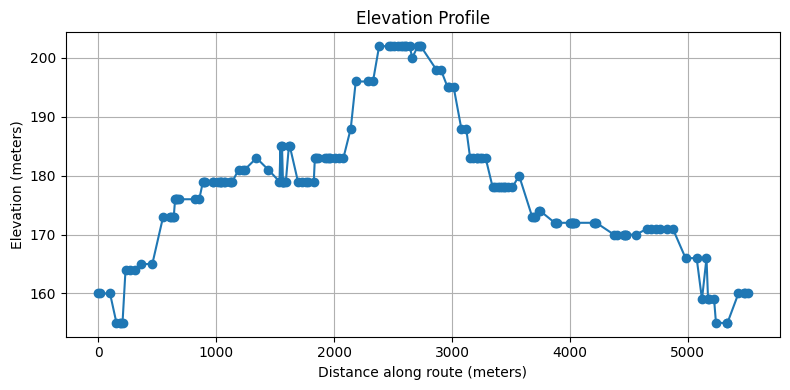

ValueError: too many values to unpack (expected 2)

In [7]:
from map import elevation
import matplotlib.pyplot as plt

elevations, distances = elevation(coordinates)
# Plot
plt.figure(figsize=(8, 4))
plt.plot(distances, elevations, marker="o")
plt.xlabel("Distance along route (meters)")
plt.ylabel("Elevation (meters)")
plt.title("Elevation Profile")
plt.grid(True)
plt.tight_layout()
plt.show()

In [6]:
from map import des_asc

total_ascent, total_descent = des_asc(elevations)
print("Total ascent:", total_ascent)
print("Total descent:", total_descent)

Total ascent: 87.0
Total descent: 87.0
